The purpose of this notebook is to demonstrate how to refine with locally defined GSAS-II functions.



# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path += ['../../../easyXRD']


import easyxrd
from easyxrd.core import exrd

import xarray as xr
import numpy as np
import pybaselines
from copy import deepcopy



Checking required packages:

---scipy package with version 1.14.0 is available and imported 
---numpy package with version 1.26.4 is available and imported 
---xarray package with version 2024.7.0 is available and imported 
---pyFAI package with version 2024.5.0 is available and imported 
---pymatgen package with version 2024.7.18 is available and imported 
---ipympl package with version 0.9.4 is available and imported 
---pandas package with version 2.2.2 is available and imported 
---mp_api package with version 0.41.2 is available and imported 
---fabio package with version 2024.4.0 is available and imported 


Imported easyxrd with following configuration:



In [3]:
# importing matplotlib for plots.
%matplotlib widget
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams['figure.constrained_layout.use'] = True

In [4]:
%%time

import pyFAI,fabio
ai_file = 'tiff_files/_calibration.poni'
mask_file = 'tiff_files/_mask.edf'
ai = pyFAI.load(ai_file)
mask = fabio.open(mask_file).data


sample_Blank = exrd()
# with xr.open_dataset('nc_files/Blank.nc') as ds:
#     img = (ds.dexela_img.astype('float32') - ds.dexela_img_dark.astype('float32')).values
#     tifffile.imwrite('tiff_files/Blank.tiff',img)
# sample_Blank.load_xrd_data(from_tiff_file='tiff_files/Blank.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,4.2),
#                             plot=True
#                             )
# sample_Blank.export_ds(save_dir='nc_files',save_name='Blank.nc')
sample_Blank.load_xrd_data(from_nc_file='nc_files/Blank.nc',
                            plot=False
                            )


sample_LaB6 = exrd()
# with xr.open_dataset('nc_files/LaB6.nc') as ds:
#     img = (ds.dexela_imgs.mean(dim='mBaseX').astype('float32') - ds.dexela_img_dark.astype('float32')).values
#     tifffile.imwrite('tiff_files/LaB6.tiff',img)
# sample_LaB6.load_xrd_data(from_tiff_file='tiff_files/LaB6.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,4.2),
#                             plot=True
#                             )
# sample_LaB6.export_ds(save_dir='nc_files',save_name='LaB6.nc')
sample_LaB6.load_xrd_data(from_nc_file='nc_files/LaB6.nc',
                            plot=False
                            )

sample_Pt = exrd()
# # with xr.open_dataset('nc_files/Pt.nc') as ds:
# #     img = (ds.dexela_img.astype('float32') - ds.dexela_img_dark.astype('float32')).values
# #     tifffile.imwrite('tiff_files/Pt.tiff',img)
# sample_Pt.load_xrd_data(from_tiff_file='tiff_files/Pt.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,4.2),
#                             plot=True
#                             )
# sample_Pt.export_ds(save_dir='nc_files',save_name='Pt.nc')
sample_Pt.load_xrd_data(from_nc_file='nc_files/Pt.nc',
                            plot=False
                            )

sample_DAHL = exrd()
# # with xr.open_dataset('nc_files/DAHL.nc') as ds:
# #     img = (ds.dexela_img.astype('float32') - ds.dexela_img_dark.astype('float32')).values
# #     tifffile.imwrite('tiff_files/DAHL.tiff',img)
# sample_DAHL.load_xrd_data(from_tiff_file='tiff_files/DAHL.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,4.2),
#                             plot=True
#                             )
# sample_DAHL.export_ds(save_dir='nc_files',save_name='DAHL.nc')
sample_DAHL.load_xrd_data(from_nc_file='nc_files/DAHL.nc',
                            plot=False
                            )

sample_Dogbone = exrd(verbose=False)
# with xr.open_dataset('nc_files/Dogbone.nc') as ds:
#     img = (ds.dexela_img.astype('float32') - ds.dexela_img_dark.astype('float32')).values
#     tifffile.imwrite('tiff_files/Dogbone.tiff',img)
# sample_Dogbone.load_xrd_data(from_tiff_file='tiff_files/Dogbone.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,4.2),
#                             plot=True
#                             )
# sample_Dogbone.export_ds(save_dir='nc_files',save_name='Dogbone.nc')
sample_Dogbone.load_xrd_data(from_nc_file='nc_files/Dogbone.nc',
                            plot=False
                            )

phases_LaB6 = [
        {"mp_id":'none', "cif":'_cifs/LaB6_a=4.1568_NIST_value.cif', "label":"LaB6", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
        ]

phases_Pt = [
        {"mp_id":'none', "cif":'_cifs/Pt_a=3.9231.cif', "label":"Pt", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
        ]


phases_Zr = [
        {"mp_id":'none', "cif":'_cifs/Zr_a=3.2320_c=5.147.cif', "label":"Zr", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
        ]

phases_PtZrZrH = [
        {"mp_id":'none', "cif":'_cifs/ZrH1.66_a=4.7839.cif', "label":"ZrH", "scale":0.993, "scale_a":1, "scale_b":1, "scale_c":1},
        {"mp_id":'none', "cif":'_cifs/Zr_a=3.2320_c=5.147.cif', "label":"Zr", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
        {"mp_id":'none', "cif":'_cifs/Pt_a=3.9231.cif', "label":"Pt", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
        ]

phases_ZrZrH = [
        {"mp_id":'none', "cif":'_cifs/ZrH1.66_a=4.7839.cif', "label":"ZrH", "scale":0.993, "scale_a":1, "scale_b":1, "scale_c":1},
        {"mp_id":'none', "cif":'_cifs/Zr_a=3.2320_c=5.147.cif', "label":"Zr", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
        ]

phases_PtZr = [
        {"mp_id":'none', "cif":'_cifs/Pt_a=3.9231.cif', "label":"Pt", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
        {"mp_id":'none', "cif":'_cifs/Zr_a=3.2320_c=5.147.cif', "label":"Zr", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
        ]

CPU times: user 333 ms, sys: 32 ms, total: 365 ms
Wall time: 365 ms


# LaB6

GSAS-II binary directory: /home/mt/G2/GSAS-II/GSASII-bin/linux_64_p3.11_n1.26
7 values read from config file /home/mt/g2full/GSAS-II/GSASII/config.py

Rwp from 1st refinement is = 5.525 
 

Rwp from 1st refinement is = 5.525 
 
Cell parameters of all phases are refined. Rwp is now 5.346 (was 5.525)
Strain broadening of all phases are refined. Rwp is now 5.413 (was 5.346)
Size broadening of all phases are refined. Rwp is now 5.364 (was 5.413)
Background is refined. Rwp is now 4.675 (was 5.364)


/home/mt/software/miniforge3/lib/python3.11/site-packages/xarray/core/computation.py:821: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


After setting LeBail refinement to False, Rwp is now 5.392 (was 4.675)
Phase fractions of all phases are refined. Rwp is now 5.392 (was 5.392)
Preferred orientation for LaB6 phase is refined. Rwp is now 5.071 (was 5.392)
Background is refined. Rwp is now 5.066 (was 5.071)


/home/mt/software/miniforge3/lib/python3.11/site-packages/xarray/core/computation.py:821: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


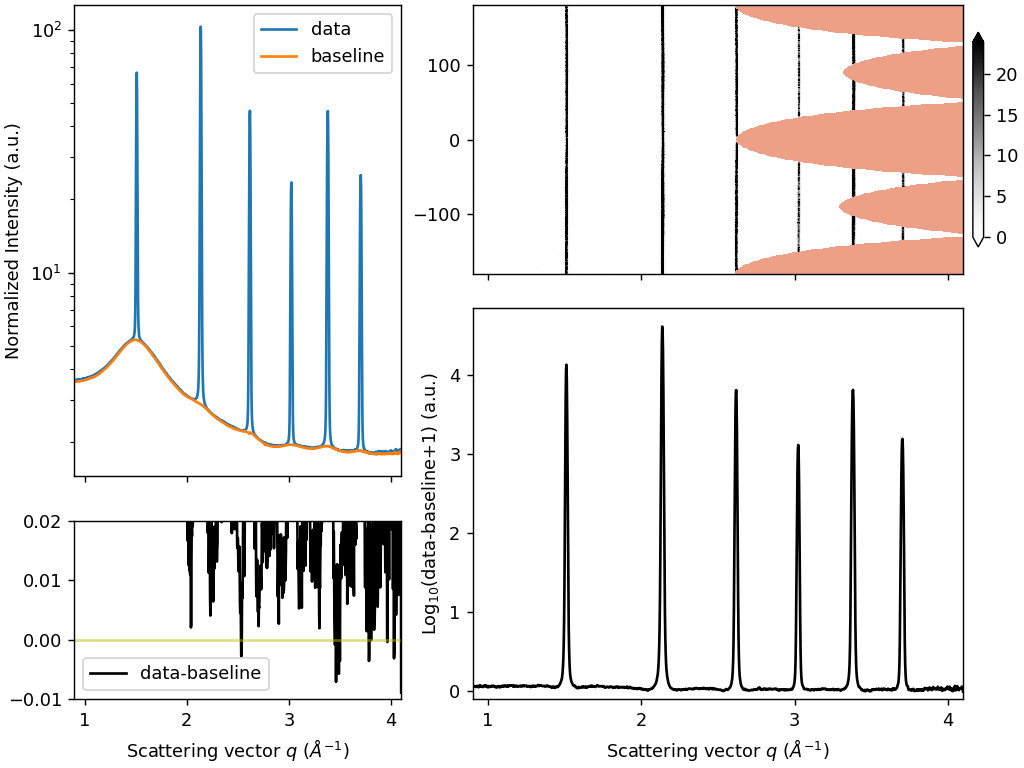

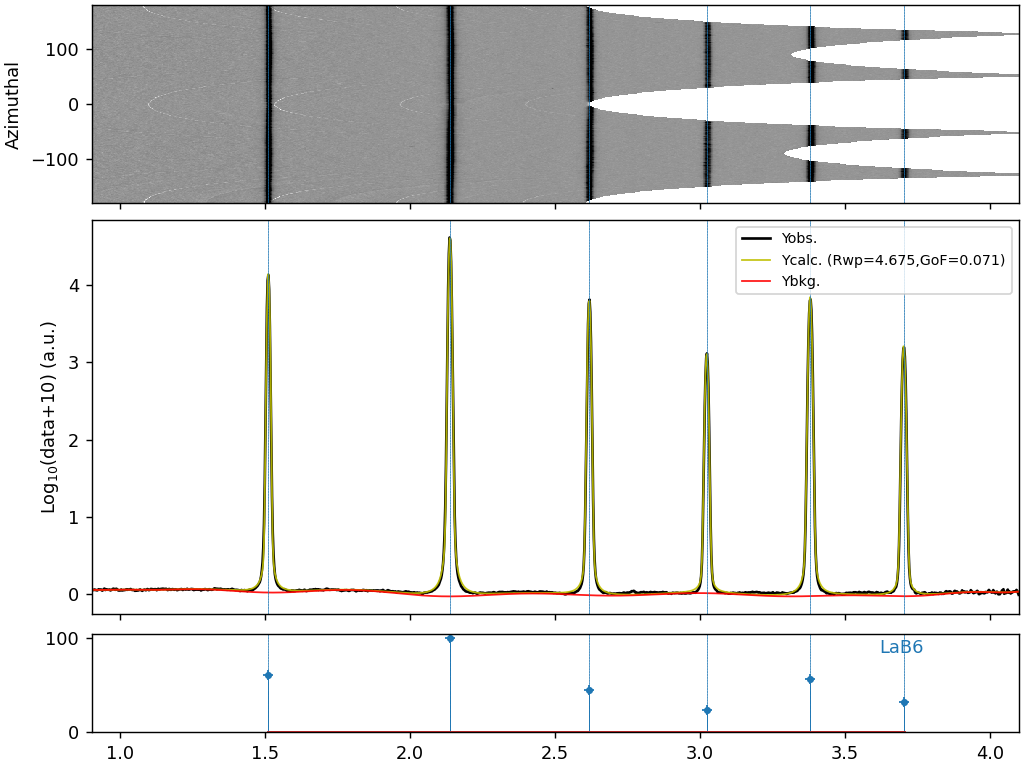

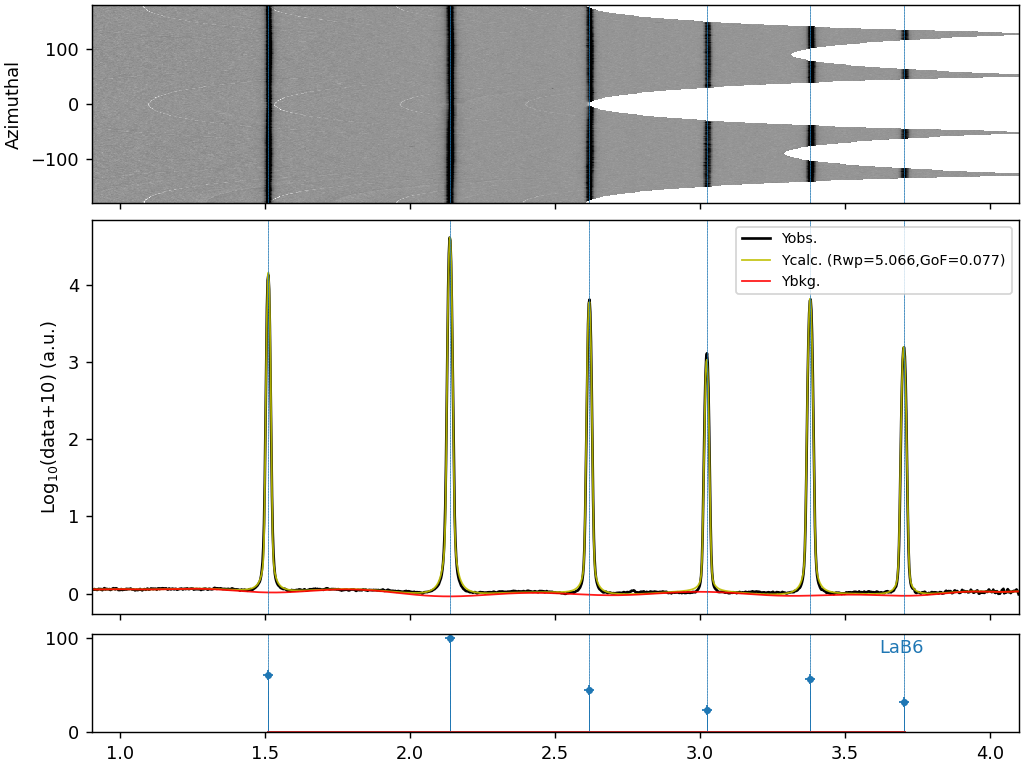

In [5]:
sample = deepcopy(sample_LaB6)


sample.get_baseline(input_bkg=sample_Blank.ds.i1d,
                    arpls_lam=1e5,
                    use_arpls=True,
                    roi_radial_range=[0.9,4.1],
                    normalize_to = 100,
                    spotty_data_correction=False,
                    spotty_data_correction_threshold=2,
                    plot=True)
sample.load_phases(phases=phases_LaB6,plot=False)

sample.setup_gsas2_calculator(instprm_from_gpx='gsas_instprms.gpx')
sample.refine_cell_params()
sample.refine_strain_broadening()
sample.refine_size_broadening()
sample.refine_background(num_coeffs=20)
sample.plot_refinement()

sample.set_LeBail(set_to=False,refine=True)
sample.refine_phase_fractions()
sample.refine_preferred_orientation(phase=0,harmonics_order=4)
sample.refine_background(num_coeffs=20)
sample.plot_refinement(ylogscale=True)

# Pt

/home/mt/software/miniforge3/lib/python3.11/site-packages/pymatgen/io/cif.py:1285: UserWarning: Issues encountered while parsing CIF: Skipping relative stoichiometry check because CIF does not contain formula keys.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))



Rwp from 1st refinement is = 20.848 
 
Cell parameters of all phases are refined. Rwp is now 9.610 (was 20.848)
Strain broadening of all phases are refined. Rwp is now 4.252 (was 9.610)
Size broadening of all phases are refined. Rwp is now 4.252 (was 4.252)
Background is refined. Rwp is now 3.807 (was 4.252)
After setting LeBail refinement to False, Rwp is now 15.412 (was 3.807)
Phase fractions of all phases are refined. Rwp is now 15.412 (was 15.412)
Preferred orientation for Pt phase is refined. Rwp is now 3.798 (was 15.412)
Background is refined. Rwp is now 3.797 (was 3.798)


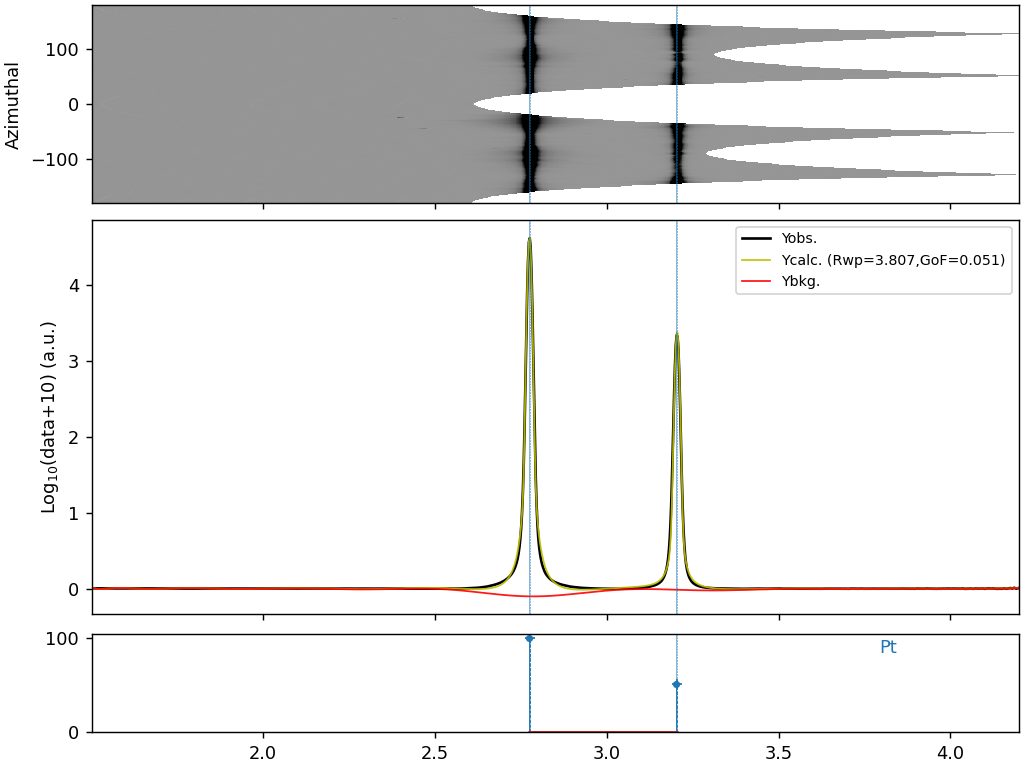

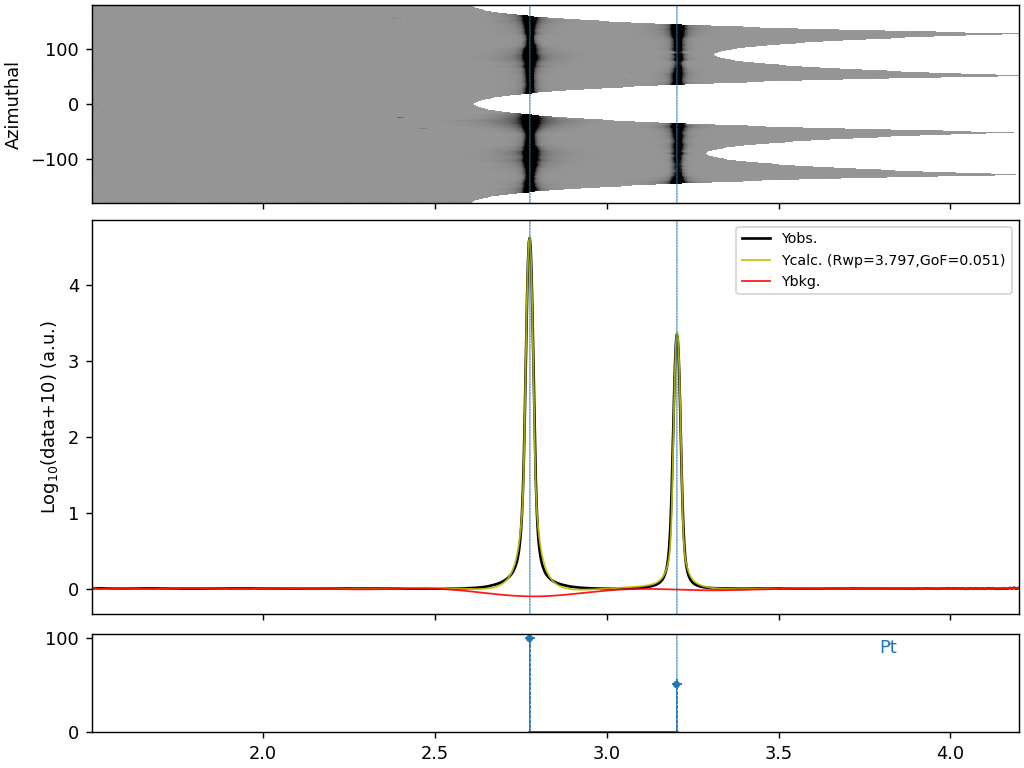

In [6]:
sample = deepcopy(sample_Pt)
sample.get_baseline(input_bkg=sample_Blank.ds.i1d,
                    arpls_lam=1e5,
                    use_arpls=False,
                    roi_radial_range=[1.5,4.2],
                    plot=False)
sample.load_phases(phases=phases_Pt,plot=False)

sample.setup_gsas2_calculator(instprm_from_gpx='gsas_LaB6.gpx')
sample.refine_cell_params()
sample.refine_strain_broadening()
sample.refine_size_broadening()
sample.refine_background(num_coeffs=20)
sample.plot_refinement()

sample.set_LeBail(set_to=False,refine=True)
sample.refine_phase_fractions()
sample.refine_preferred_orientation(phase=0,harmonics_order=4)
sample.refine_background(num_coeffs=20)
sample.plot_refinement(ylogscale=True)

# DAHL

/home/mt/software/miniforge3/lib/python3.11/site-packages/pymatgen/io/cif.py:1285: UserWarning: Issues encountered while parsing CIF: Skipping relative stoichiometry check because CIF does not contain formula keys.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))
/home/mt/software/miniforge3/lib/python3.11/site-packages/pymatgen/io/cif.py:1285: UserWarning: Issues encountered while parsing CIF: 2 fractional coordinates rounded to ideal values to avoid issues with finite precision.
Skipping relative stoichiometry check because CIF does not contain formula keys.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))



Rwp from 1st refinement is = 35.483 
 
Cell parameters of all phases are refined. Rwp is now 33.162 (was 35.483)
Strain broadening of all phases are refined. Rwp is now 13.091 (was 33.162)
Size broadening of all phases are refined. Rwp is now 13.028 (was 13.091)
Background is refined. Rwp is now 11.515 (was 13.028)


/home/mt/software/miniforge3/lib/python3.11/site-packages/pymatgen/io/cif.py:1285: UserWarning: Issues encountered while parsing CIF: 2 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


After setting LeBail refinement to False, Rwp is now 60.318 (was 11.515)
Phase fractions of all phases are refined. Rwp is now 34.590 (was 60.318)
Preferred orientation for Pt phase is refined. Rwp is now 25.598 (was 34.590)
Preferred orientation for Zr phase is refined. Rwp is now 13.399 (was 25.598)
Background is refined. Rwp is now 13.098 (was 13.399)
Background is refined. Rwp is now 13.098 (was 13.098)


/home/mt/software/miniforge3/lib/python3.11/site-packages/pymatgen/io/cif.py:1285: UserWarning: Issues encountered while parsing CIF: 2 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


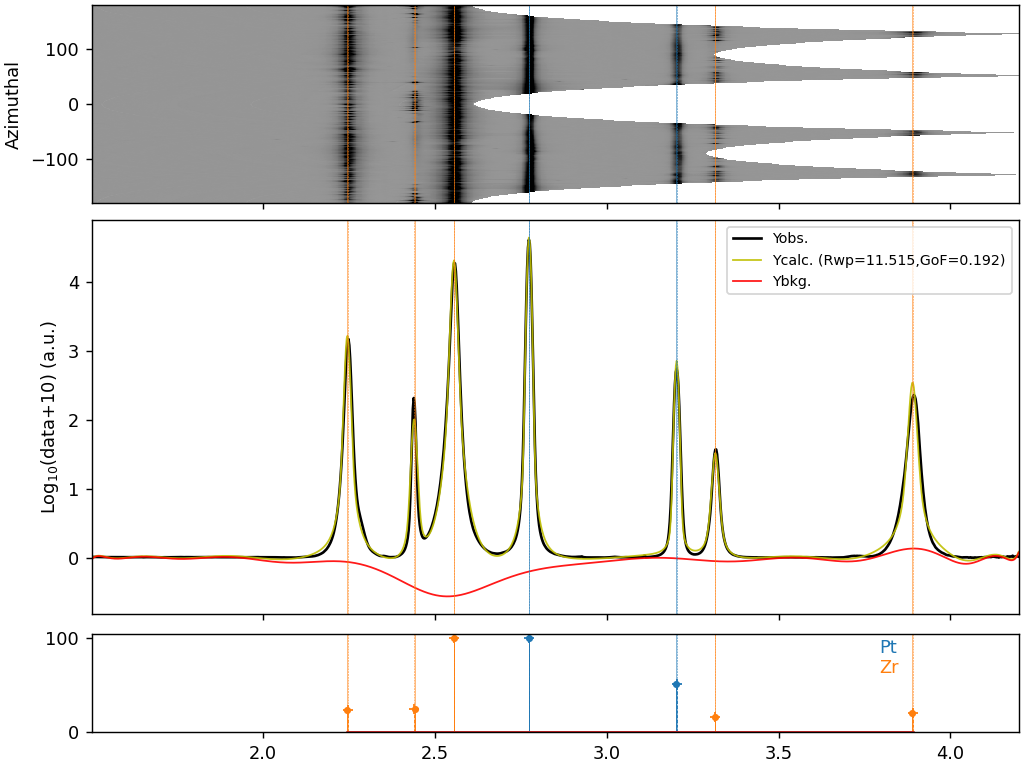

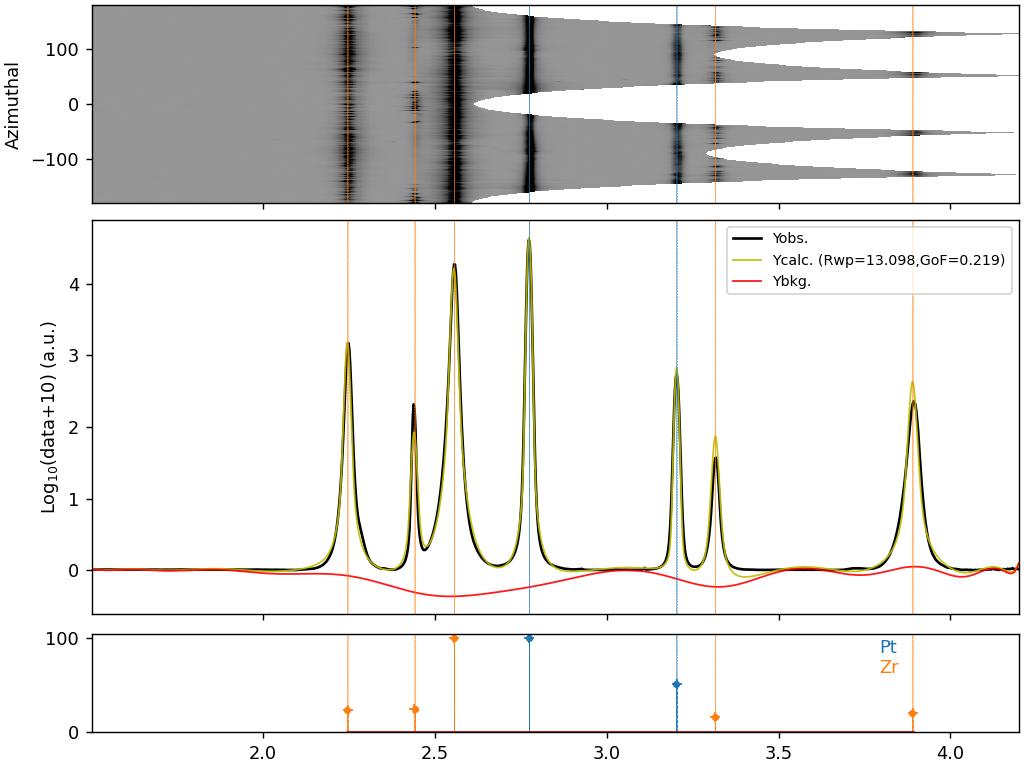

In [7]:

sample = deepcopy(sample_DAHL)
sample.get_baseline(input_bkg=sample_Blank.ds.i1d,
                    arpls_lam=1e5,
                    use_arpls=True,
                    roi_radial_range=[1.5,4.2],
                    normalize_to=100,
                    plot=False)
sample.load_phases(phases=phases_PtZr,plot=False)


sample.setup_gsas2_calculator(instprm_from_gpx='gsas_LaB6.gpx')
sample.refine_cell_params()
sample.refine_strain_broadening()
sample.refine_size_broadening()
sample.refine_background(num_coeffs=20)
sample.plot_refinement()

sample.set_LeBail(set_to=False,refine=True)
sample.refine_phase_fractions()

sample.refine_preferred_orientation(phase=0,harmonics_order=4)
sample.refine_preferred_orientation(phase=1,harmonics_order=4)
sample.refine_background(num_coeffs=20)
sample.refine_background(num_coeffs=20)
sample.plot_refinement(ylogscale=True)


# Dogbone

/home/mt/software/miniforge3/lib/python3.11/site-packages/pymatgen/io/cif.py:1285: UserWarning: Issues encountered while parsing CIF: Skipping relative stoichiometry check because CIF does not contain formula keys.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))
/home/mt/software/miniforge3/lib/python3.11/site-packages/pymatgen/io/cif.py:1285: UserWarning: Issues encountered while parsing CIF: 2 fractional coordinates rounded to ideal values to avoid issues with finite precision.
Skipping relative stoichiometry check because CIF does not contain formula keys.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))



Rwp from 1st refinement is = 20.840 
 
Cell parameters of all phases are refined. Rwp is now 19.650 (was 20.840)
Strain broadening of all phases are refined. Rwp is now 8.017 (was 19.650)
Size broadening of all phases are refined. Rwp is now 8.008 (was 8.017)
Background is refined. Rwp is now 6.173 (was 8.008)


/home/mt/software/miniforge3/lib/python3.11/site-packages/pymatgen/io/cif.py:1285: UserWarning: Issues encountered while parsing CIF: 2 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


After setting LeBail refinement to False, Rwp is now 70.976 (was 6.173)
Phase fractions of all phases are refined. Rwp is now 50.143 (was 70.976)
Preferred orientation for Zr phase is refined. Rwp is now 8.137 (was 50.143)
Background is refined. Rwp is now 7.998 (was 8.137)


/home/mt/software/miniforge3/lib/python3.11/site-packages/pymatgen/io/cif.py:1285: UserWarning: Issues encountered while parsing CIF: 2 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


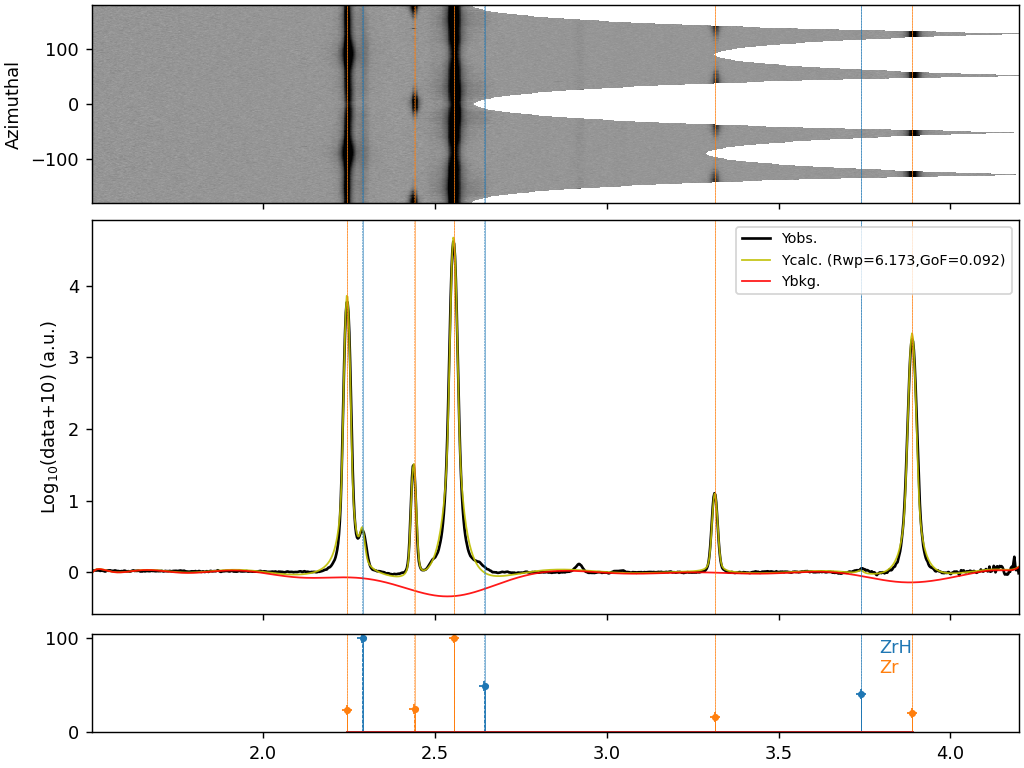

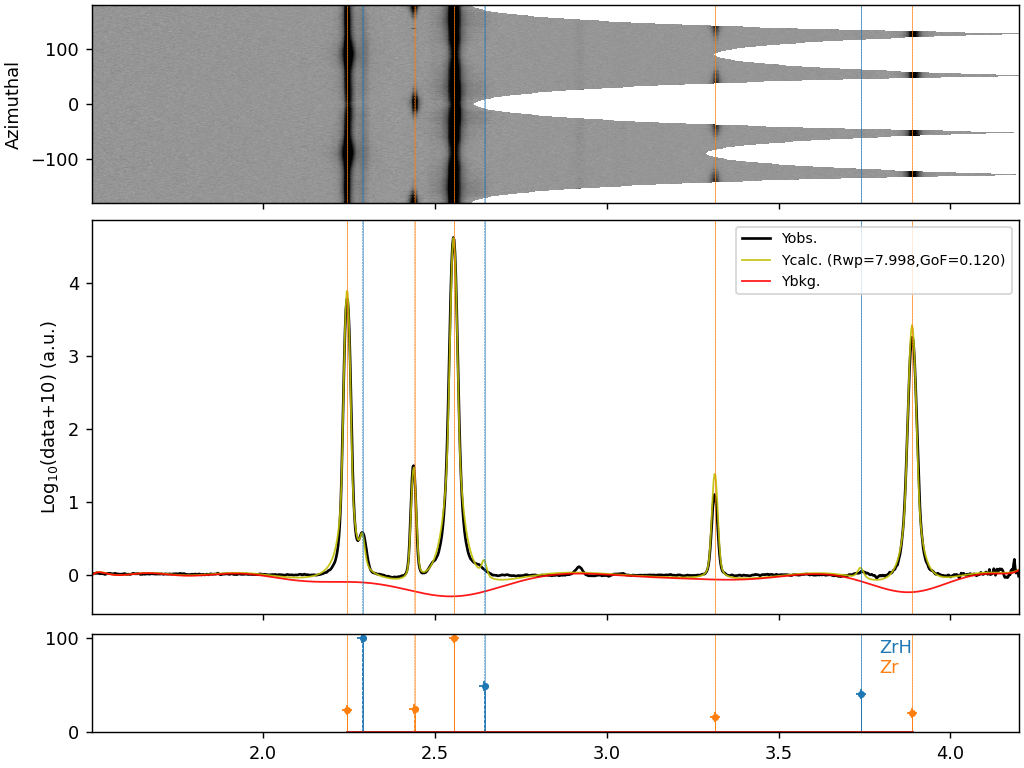

In [8]:

sample = deepcopy(sample_Dogbone)
sample.get_baseline(input_bkg=sample_Blank.ds.i1d,
                    arpls_lam=1e5,
                    use_arpls=True,
                    roi_radial_range=[1.5,4.2],
                    normalize_to=100,
                    plot=False)
sample.load_phases(phases=phases_ZrZrH,plot=False)


sample.setup_gsas2_calculator(instprm_from_gpx='gsas_LaB6.gpx')
sample.refine_cell_params()
sample.refine_strain_broadening()
sample.refine_size_broadening()
sample.refine_background(num_coeffs=20)
sample.plot_refinement()

sample.set_LeBail(set_to=False,refine=True)
sample.refine_phase_fractions()
sample.refine_preferred_orientation(phase=1,harmonics_order=4)
sample.refine_background(num_coeffs=20)
sample.plot_refinement(ylogscale=True)
